# World Bank Statistical Performance Indicators 
This project will analyze World Bank’s Statistical Performance Indicators (SPI) which monitor the statistical performance of countries across the world from 2016 to 2019 as a replacement of the now-obsolete SCI indexes. It will provide a comprehensive deep-dive into the constitution of the index and the raw data for the indicators. It will also explore relationships between the index and variables such as a country’s income level.

Summary of contents:
1.	Introduction
2.	Questions to Be Answered
3.	Data Inspection and Cleaning
4.	Analysis and Answers to Questions
5.	Conclusions and Discussion
6.	References

**Introduction: **

Decisions making from data becomes more prominent throughout public and private sectors in the global economy. Economic and financial policies among countries often rely on statistics provided domestically and internationally. It is evident that a strong statistical capacity is a prerequisite to help formulate decisions. However, statistical capacities differ significantly across countries, which entails difficulty in interpreting data with different comparability and reliability. The SPI, devised by the World Bank, aims to measure such capacity as a universally comprehensive metric. It is preceded by the Statistical Capacity Indicators and Index (SCI), which was developed by the World Bank in 2004. With the SCI’s limitation in relevance in global analysis and keeping up with the advances in computing and storage capacity (Dang, et al, 2023), The SPI provides a new framework in measurement. 

The SPI covers 181 countries while identifying five major pillars in its evaluation: data use, data services, data products, data sources and data infrastructure.  Of the 22 dimensions across the five pillars, 14 dimensions of 51 indicators have established and measurable methodology and are therefore included in the calculations of the index (World Bank, 2023b). The overall score and the scores in each pillar are constructed using the average of scores across all five pillars with its “nested weighting structure… (which) offers symmetry, monotonicity and subgroup decomposability” (Dang, et al, 2023). 

In this paper, I will perform analysis as well as visualization on the raw data for the SPI indexes and draw conclusions on some interesting questions regarding the descriptive nature of the dataset. I personally find this dataset interesting because I’ve long heard the difference in reliability of statistics among countries. Anecdotally, some official statistics provided by accredited institutions and nations have been found inauthentic as data reported could be manipulated to fit certain economic or political agenda. This sparked my interests in exploring how statistics are gathered, reported, analyzed and further utilized in a large population. 

**Questions to be answered:**

This report will address the following questions:
1.	What are the 10 countries with best and worst SPI scores? 
2.	Rank the SPI scores by region in 2019.
3.	Explore the distribution and relationships of SPI score and its 5 pillars.
4.	Make a scatterplot of all the countries regarding their geological positions and color them with the latest (2019) SPI scores
5.	Sample US, Australia, China, Japan, India across all dimensions, what can you tell? 
6.	Track China’s performance for all pillars over time (2016-2019) 
7.  Track all countries’s performances for all pillars over time (2016-2019)
8.	Correlation between SPI score vs. other variables of the countries (latest population census, lending category)

**Data Files**

The following data files are used in this notebook. An overview of the files is provided here, but a detailed examination of the contents will be provided in section 4 below. The names of the countries (‘country’ or ‘country code’) serves as the primary key between the files. 
1)	SPI_index.csv

File obtained from the World Bank SPI Github Repository (World Bank, 2023a). This is the main file I will be analyzing which includes index values for 217 countries from 2004 to 2019. Numeric values of each dimension, pillar, contributing indicators as well as the overall score are provided for each country in a given year. This dateset also includes helpful information in the column ‘population’.

2)	SPI_data

File obtained from the World Bank SPI Github Repository(World Bank, 2023a). This file contains all raw data of the indicators across the years. We will only use this file to access the longitude and latitude of the countries. 

3)	SPIcountry.csv

File obtained from Kaggle (Tanwar, 2023) as additional information. Main data columns include: Country Code, Short Name, Region, Income Group, Lending Category, Latest population survey, System of national Accounts, Vital registration complete 

4)	index description.csv

This file provides additional information on metadata of SPI_index.csv. The file was modified from the research paper published by World Bank for descriptions of each abbreviation of the input variable for SPI calculation (Dang, et al, 2023). Information on this file includes variable name, type of the variables, description of the each variable, and ranges of variable value





**Data Inspection and Cleaning**


In [16]:
# Import all the necessary libraries 
# Start by importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import all data files 

# Data for each country
df_country = pd.read_csv('SPICountry.csv')
# Index data for each country
df_index = pd.read_csv('SPI_index.csv')
# Raw data file of SPI to access longitude and latitude of the countries
df_location = pd.read_csv('SPI_data.csv')
# Meta data of SPI_index file in access descriptions of the indicators
df_metadata = pd.read_csv('index description.csv', names=['VARIABLE','DATA TYPE','DESCRIPTION','RANGE'])

# Data cleaning, manipulation and inspection 
# Inspect the df_index main file 
print(df_index.info())
print(df_index.shape) #(3488, 79)
# Rename the columns to make them more informative 
df_index.columns=df_index.columns.str.upper()
df_index=df_index.rename(columns={'ISO3C':'COUNTRY CODE'})
print(df_index.columns)
print(df_index['COUNTRY'].value_counts()) 
print(df_index['DATE'].unique()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3488 entries, 0 to 3487
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3488 non-null   object 
 1   iso3c                           3488 non-null   object 
 2   date                            3488 non-null   int64  
 3   SPI.INDEX.PIL1                  3488 non-null   float64
 4   SPI.INDEX.PIL2                  692 non-null    float64
 5   SPI.INDEX.PIL3                  3225 non-null   float64
 6   SPI.INDEX.PIL4                  689 non-null    float64
 7   SPI.INDEX.PIL5                  755 non-null    float64
 8   SPI.INDEX                       689 non-null    float64
 9   SPI.DIM1.5.INDEX                3488 non-null   float64
 10  SPI.DIM2.1.INDEX                1282 non-null   float64
 11  SPI.DIM2.2.INDEX                839 non-null    float64
 12  SPI.DIM2.4.INDEX                76

In the main file df_index, the column 'COUNTRY' has length 218 and 16 value counts (meaning 218 countries are assessed throughout the timespan of 16 years). 

Unique values for the column 'DATE' ranges from 2004 to 2019, which corresponds to the years the indicators have measured. 

In addition, SPI_index has 689 entries with missing values present, which implies only overall scores in 2016-2019 are recorede although data exists for all pillars dating from 2004.

In [3]:
# Inspect the df_country dataset
print(df_country.info())  # only 217 countries are included in this dataset
# Rename the columns to make them more informative
df_country.columns = df_country.columns.str.upper()
# Let's find out what's the country excluded from df_country
x = set(df_country["COUNTRY CODE"])
y = set(df_index["COUNTRY CODE"])
print(x.symmetric_difference(y))  # TWN (Taiwan) was not included in df_country
# Exclude Taiwan from the df_index dataset to make things easier to work with
df_index = df_index[df_index["COUNTRY CODE"] != "TWN"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       217 non-null    object 
 1   Short Name                                         217 non-null    object 
 2   Table Name                                         217 non-null    object 
 3   Long Name                                          217 non-null    object 
 4   2-alpha code                                       215 non-null    object 
 5   Currency Unit                                      217 non-null    object 
 6   Special Notes                                      58 non-null     object 
 7   Region                                             217 non-null    object 
 8   Income Group                                       217 non-null    object 
 9   WB-2 code 

I found out that Taiwan was included in the main file but excluded from the file modified on kaggle. I did some data cleaning to remove Taiwan from index_country to allow for analysis later.

In [4]:
# Let's inspect df_index in year 2019
df_index_2019 = df_index[df_index["DATE"] == 2019]
print(
    df_index_2019.info()
) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 217
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COUNTRY                         217 non-null    object 
 1   COUNTRY CODE                    217 non-null    object 
 2   DATE                            217 non-null    int64  
 3   SPI.INDEX.PIL1                  217 non-null    float64
 4   SPI.INDEX.PIL2                  175 non-null    float64
 5   SPI.INDEX.PIL3                  215 non-null    float64
 6   SPI.INDEX.PIL4                  174 non-null    float64
 7   SPI.INDEX.PIL5                  190 non-null    float64
 8   SPI.INDEX                       174 non-null    float64
 9   SPI.DIM1.5.INDEX                217 non-null    float64
 10  SPI.DIM2.1.INDEX                217 non-null    float64
 11  SPI.DIM2.2.INDEX                179 non-null    float64
 12  SPI.DIM2.4.INDEX                191 

Only 174 countries have an overall index score, this makes sense because it coincides with the least number of entries in all pillars: SPI.INDEX.PIL4.

This implies that only countries with complete score for all five pillars will have a valid overall score, and pillar 4 lacks the most data.

Let's find out what's causing difficulty in measuring pillar 4(data sources) indicators! 


In [5]:
# Show description for all dimensions in pillar 4 
D4_boolean = df_metadata['VARIABLE'].str.contains('SPI.D4')
df_metadata.loc[D4_boolean]
# Now we have an overview of which indicators are used in measuring data sources 

,VARIABLE,DATA TYPE,DESCRIPTION,RANGE
53,SPI.D4.1.1.POPU,numeric,Dimension 4.1: censuses and surveys - Populati...,Num: 0 to 1
54,SPI.D4.1.2.AGRI,numeric,Dimension 4.1: censuses and surveys - Agricult...,Num: 0 to 1
55,SPI.D4.1.3.BIZZ,numeric,Dimension 4.1: censuses and surveys - Business...,Num: 0 to 1
56,SPI.D4.1.4.HOUS,numeric,Dimension 4.1: censuses and surveys - Househol...,Num: 0 to 1
57,SPI.D4.1.5.AGSVY,numeric,Dimension 4.1: censuses and surveys - Agricult...,Num: 0 to 1
58,SPI.D4.1.6.LABR,numeric,Dimension 4.1: censuses and surveys - Labor Fo...,Num: 0 to 1
59,SPI.D4.1.7.HLTH,numeric,Dimension 4.1: censuses and surveys - Health/D...,Num: 0 to 1
60,SPI.D4.1.8.BZSVY,numeric,Dimension 4.1: censuses and surveys - Business...,Num: 0 to 1
61,SPI.D4.2.3.CRVS,numeric,Dimension 4.2: administrative data - CRVS (WDI),Num: 0 to 1
62,SPI.D4.3.GEO.first.admin.level,numeric,Dimension 4.3: geospatial data - Geospatial da...,Num: 0 to 0.795


In [6]:
# Inspecting missing values in the dataset
# Inspect missing values in the SPI scores in 2019
print(
    df_index_2019["SPI.INDEX"].isnull().value_counts()
)  


False    174
True      43
Name: SPI.INDEX, dtype: int64


There are 174 non-missing values, and 43 missing values in overall index scores, which is aligned with our analysis earlier.

In [7]:
# Inspect df_location 
# Rename the columns to make them more informative 
df_location.columns=df_location.columns.str.upper()
df_location=df_location.rename(columns={'ISO3C':'COUNTRY CODE'})
# Let's inspect the columns of longitude and latitude of the countries in 2019 only 
df_location_2019=df_location[df_location['DATE']==2019]
df_location_2019[['COUNTRY','COUNTRY CODE','DATE','LONG','LAT']]

,COUNTRY,COUNTRY CODE,DATE,LONG,LAT
15,Afghanistan,AFG,2019,69.17610,34.5228
31,Albania,ALB,2019,19.81720,41.3317
47,Algeria,DZA,2019,3.05097,36.7397
63,American Samoa,ASM,2019,-170.69100,-14.2846
79,Andorra,AND,2019,1.52180,42.5075
...,...,...,...,...,...
3423,Virgin Islands (U.S.),VIR,2019,-64.89630,18.3358
3439,West Bank and Gaza,PSE,2019,NaN,NaN
3455,"Yemen, Rep.",YEM,2019,44.20750,15.3520
3471,Zambia,ZMB,2019,28.29370,-15.3982


**Analysis and Answers to Questions**

<Axes: title={'center': 'SPI scores bottom 10 countries'}, ylabel='COUNTRY'>

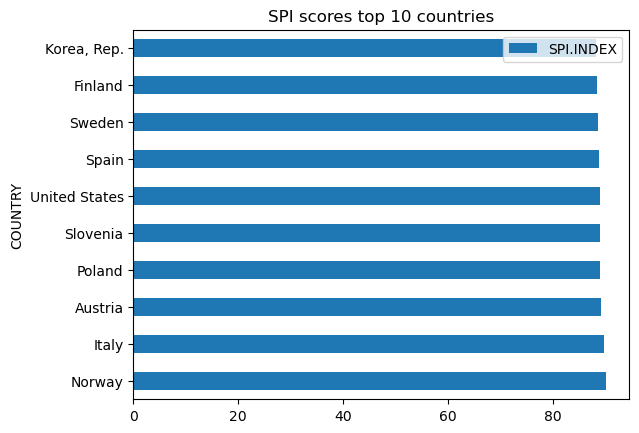

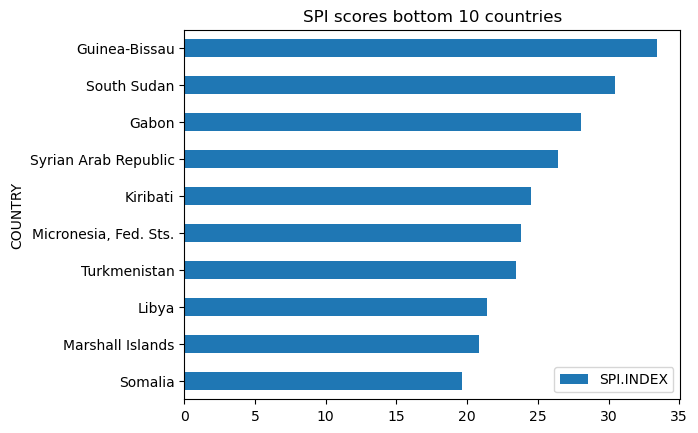

In [8]:
# What are the top 10 countries with best and worst SPI scores? 
df_q1 = df_index_2019[['COUNTRY','SPI.INDEX']]
df_q1.set_index('COUNTRY',inplace=True)
# Remove missing values
df_q1 = df_q1[df_q1['SPI.INDEX'].notnull()]
# sort the dataset 
df_q1_bottom10 = df_q1.sort_values(by='SPI.INDEX')
df_q1_top10 = df_q1.sort_values(by='SPI.INDEX',ascending=False)
#Plot the datasets as horizontal barplots
df_q1_top10.head(10).plot(
    kind='barh',
    title='SPI scores top 10 countries'
)
df_q1_bottom10.head(10).plot(
    kind='barh',
    title='SPI scores bottom 10 countries'
)

From the barchart, we can tell that the 10 countries with top SPI index scores are: Korea, finland, Sweden, Spain, USA, Slovenia, Poland, Australia, Italy, and Norway. 
The 10 countries with bottom SPI index scores are: Guinea-Bissau, South Sudan, Gabon, Syria, Kiribati, Micronesia, Turkmenistan, Libya, Marshall Islands and Somalia. 

<Axes: title={'center': 'Average SPI scores by Continent in 2019'}, ylabel='REGION'>

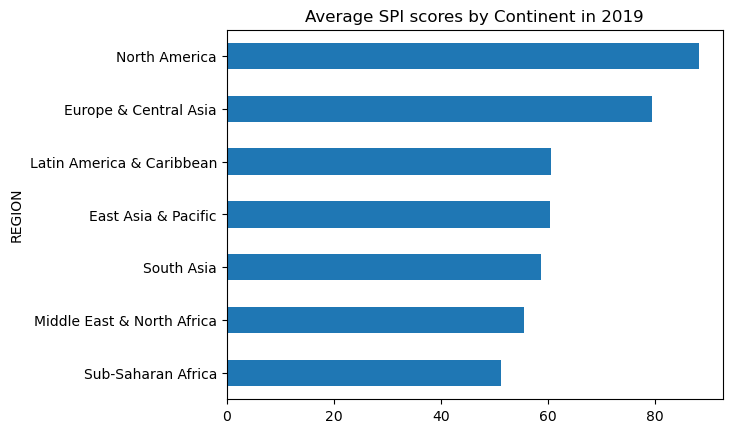

In [9]:
# q2 SPI scores by region 2019
df_q2 = df_index_2019[["COUNTRY", "SPI.INDEX", "REGION"]]
df_q2.set_index("COUNTRY", inplace=True)
df_q2 = df_q2.groupby("REGION")["SPI.INDEX"].mean().sort_values()
df_q2.plot(
    kind="barh",
    title="Average SPI scores by Continent in 2019",
)


From the barchart, we can tell that in 2019, continents ranked by SPI index scores are: North America, Europe and Central Asia, Latin American and Caribbean, East Asia and Pacific, South Asia, Middle East and North Africa, Sub-Saharan Africa. 

       SPI.INDEX.PIL1  SPI.INDEX.PIL2  SPI.INDEX.PIL3  SPI.INDEX.PIL4  \
count      217.000000      175.000000      215.000000      174.000000   
mean        76.035023       67.251619       55.338343       48.774521   
std         24.928347       21.506617       18.495230       20.017754   
min          0.000000        0.633333        7.056250        0.000000   
25%         60.000000       59.216667       45.246875       33.666667   
50%         80.000000       64.000000       59.675000       49.608333   
75%        100.000000       86.516667       69.384375       65.325000   
max        100.000000      100.000000       89.318750       87.500000   

       SPI.INDEX.PIL5   SPI.INDEX  
count      190.000000  174.000000  
mean        52.500000   63.033800  
std         29.198962   17.644521  
min          0.000000   19.617917  
25%         30.000000   52.046979  
50%         45.000000   61.824167  
75%         80.000000   78.060208  
max        100.000000   90.093750  


/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


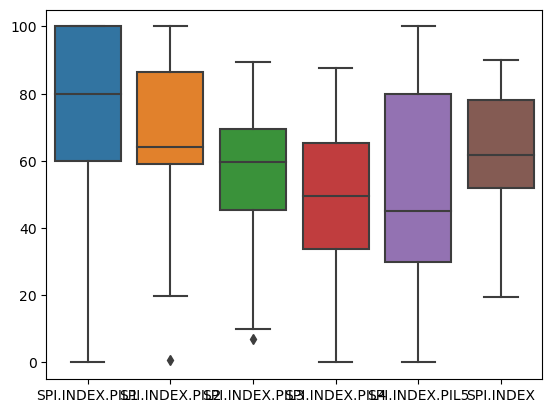

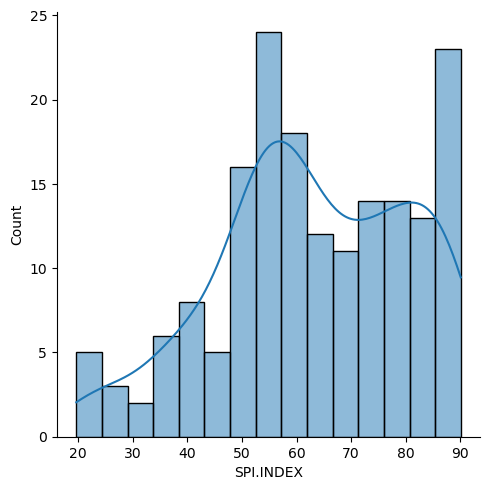

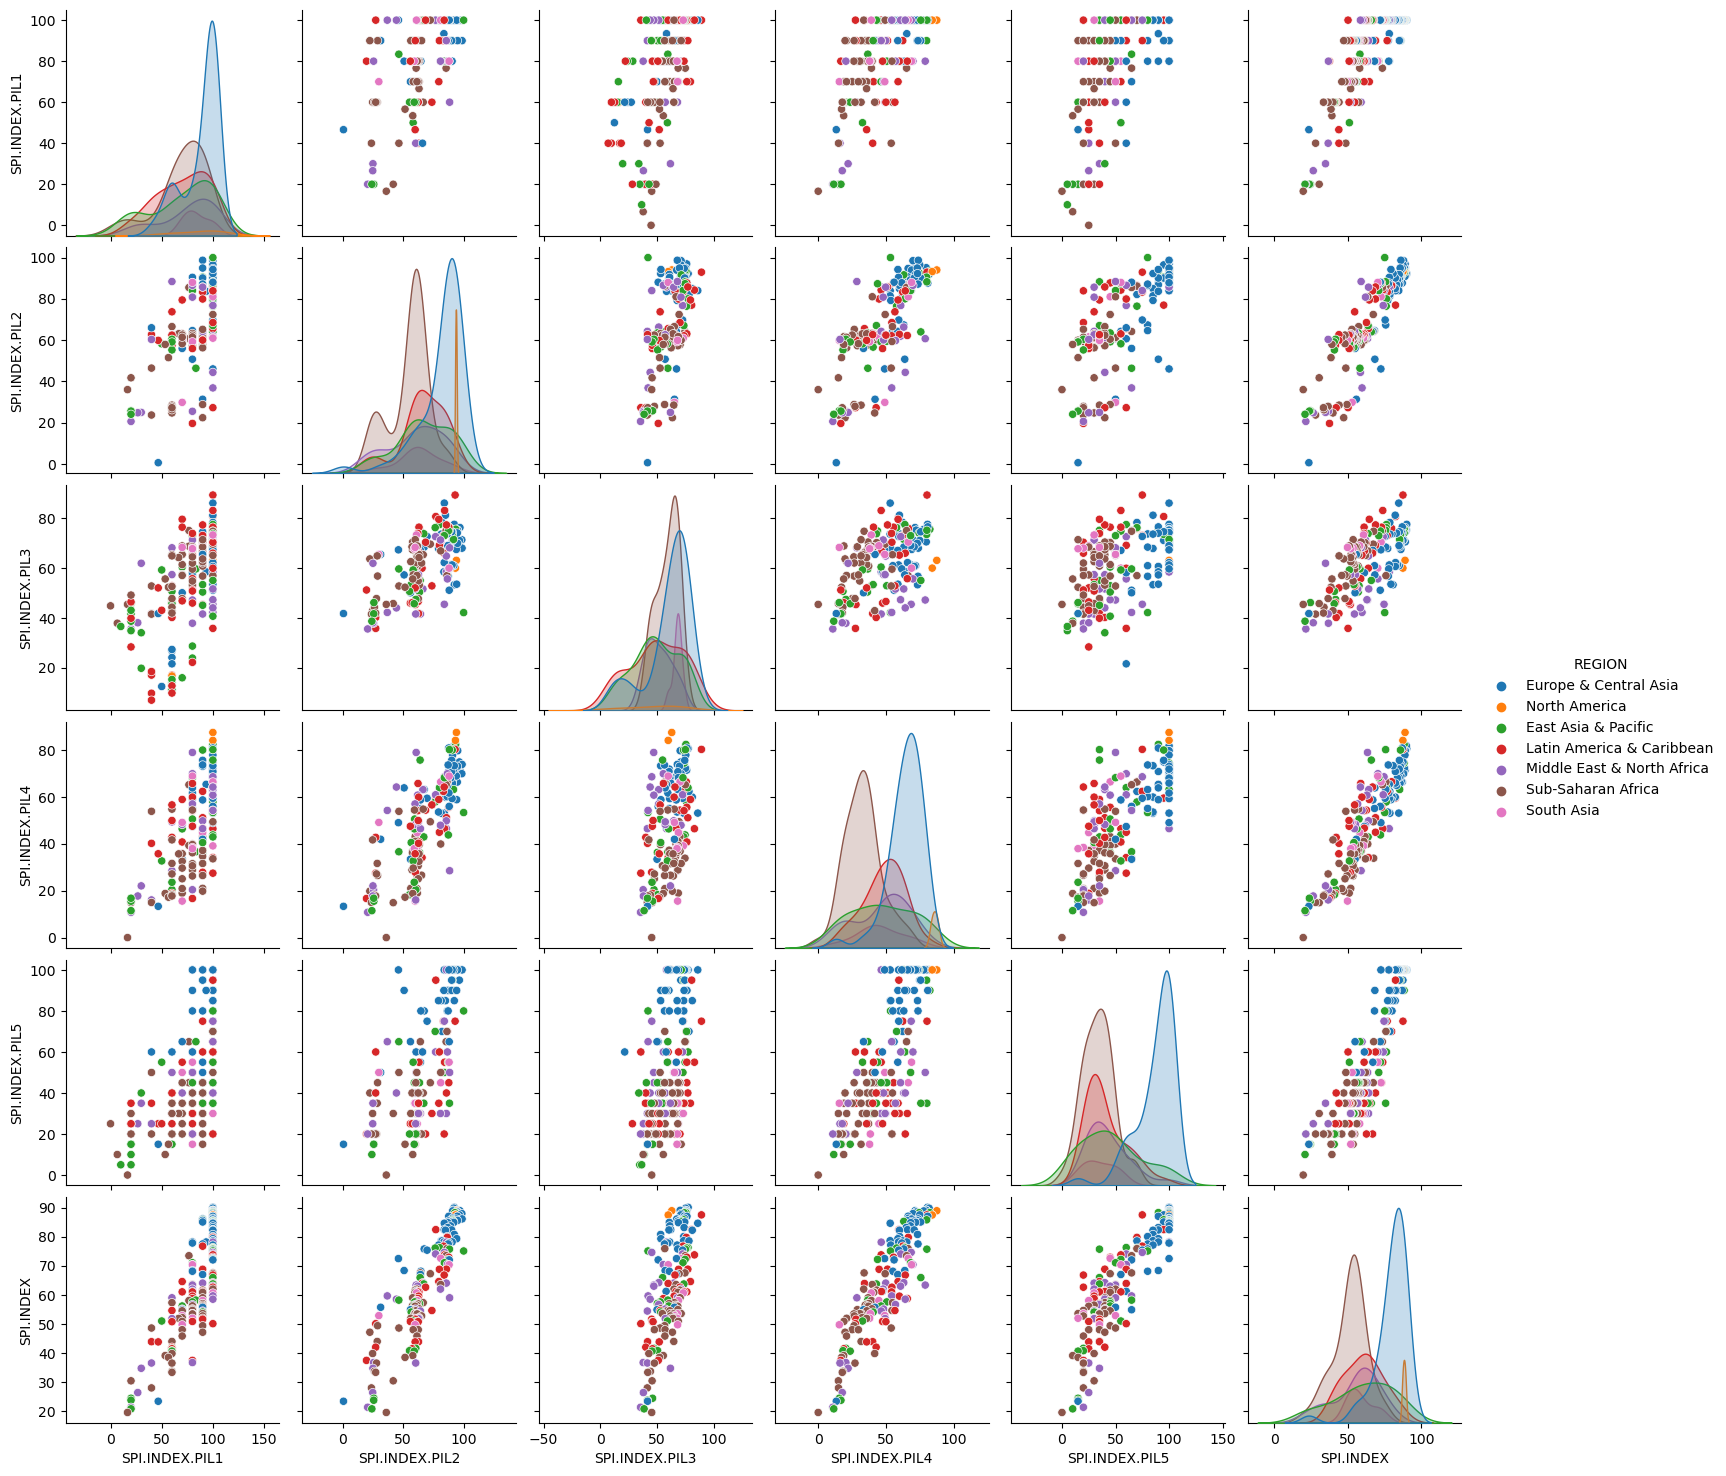

In [10]:
# Explore the distribution and relationships of SPI score and its 5 pillars distribution in 2019.
df_q3=df_index_2019.iloc[:,[0,1,3,4,5,6,7,8,75,76]]
df_q3.set_index('COUNTRY',inplace=True)
#SPI score distributions for all pillars 
pillars_2019=df_q3.iloc[:,1:7]
print(pillars_2019.describe()) 
sns.boxplot(data=pillars_2019) 
#Distribution of SPI score 
sns.displot(df_q3['SPI.INDEX'],kde=True,bins=15) #histogram+kde
# Relationship across all pillars, colored by region
sns.pairplot(df_q3,hue='REGION') #histogram+kde

From the data above, we can tell SPI.INDEX.PIL1 (data use) has the most data points (217), while SPI.INDEX.PIL4 (data sources) and SPI.INDEX both have the least (174). This could suggest more consistent data collection for SPI.INDEX.PIL1 or potential missing values in the latter two indices. 

SPI.INDEX.PIL1 tends to have higher values, both in terms of average and median, and it also has a wide range in its data. It also has the most data points, suggesting it might be a more consistently measured or more essential index.
SPI.INDEX.PIL3 (data products) and SPI.INDEX.PIL4 seem to represent lower values, both in terms of mean and median. SPI.INDEX.PIL4 has the lowest mean value of 48.77, indicating that its values tend to be lower on average.
SPI.INDEX.PIL5 (data infrastructure) exhibits the highest standard deviation (29.20), suggesting its values are more spread out from the mean. This could imply higher volatility in this index. SPI.INDEX.PIL3 has the least dispersion with a standard deviation of 18.50.

SPI.INDEX sits in the middle in terms of its mean, because it is acomposite index that aggregates and averages the other indices. The distribution of the index appears to be double peaked with most of its values in range from 50 to 100 and it's postively correlated with values of all five pillars. Findings in the scatterplot matrix regarding the data categorized by region is aligned with my analsis in the last question.

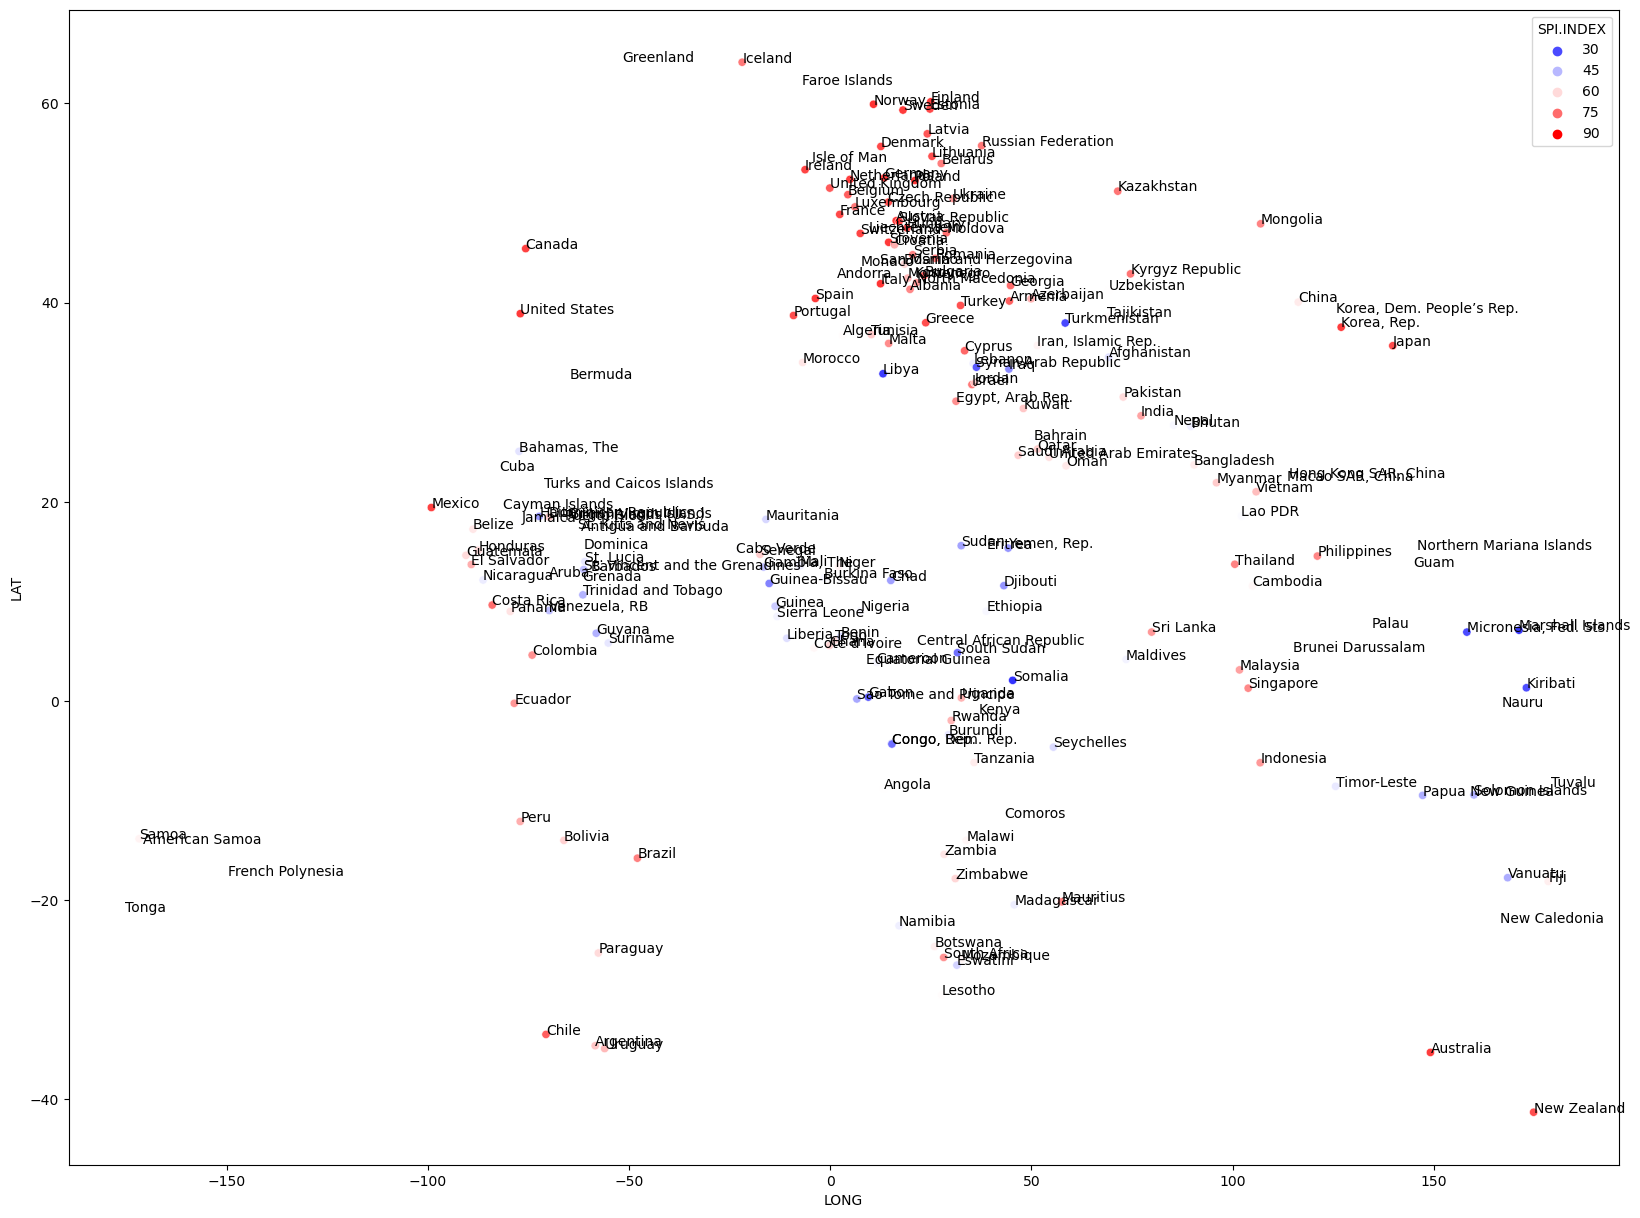

In [11]:
# Plot the SPI against each country's geological location
df_location_2019 = df_location_2019[["COUNTRY", "COUNTRY CODE", "LONG", "LAT"]]
df_q4 = df_index_2019.merge(df_location_2019, on="COUNTRY")
df_q4 = df_q4.set_index("COUNTRY")
fig = plt.figure(figsize=[20, 15])
ax = sns.scatterplot(  # Use a seaborn relplot (relational plot between two variables)
    data=df_q4,  # Specify the data source
    x="LONG",
    y="LAT",
    hue="SPI.INDEX",  # Specify colours for categorical data
    alpha=0.8,
    palette="bwr",
)
# Label each country on the scatterplot
for i, country in enumerate(df_q4.index):
    ax.annotate(country, (df_q4["LONG"].iloc[i], df_q4["LAT"].iloc[i]))


This is an interesting practice as it gives the color of each country based on the SPI score and the plot resembles the countries geo-locations. 

<Axes: xlabel='COUNTRY'>

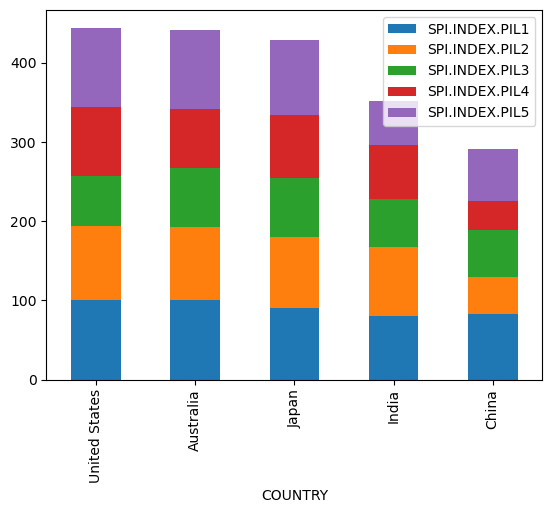

In [12]:
# Sample US, Australia, China, Japan, India across all dimensions 2019
df_sample = df_index_2019.iloc[:, [0, 3, 4, 5, 6, 7]]
df_sample = df_sample[
    (df_sample["COUNTRY"] == "United States")
    | (df_sample["COUNTRY"] == "Australia")
    | (df_sample["COUNTRY"] == "China")
    | (df_sample["COUNTRY"] == "Japan")
    | (df_sample["COUNTRY"] == "India")
]
df_sample = df_sample.set_index("COUNTRY")
df_sample.plot(kind="bar", stacked=True)


These five countries ranked by SPI overall scores in descending order are: USA, Australia, Japan, India and China. All five dimensions within the overall score have approximately the same ranking.

<Axes: xlabel='DATE'>

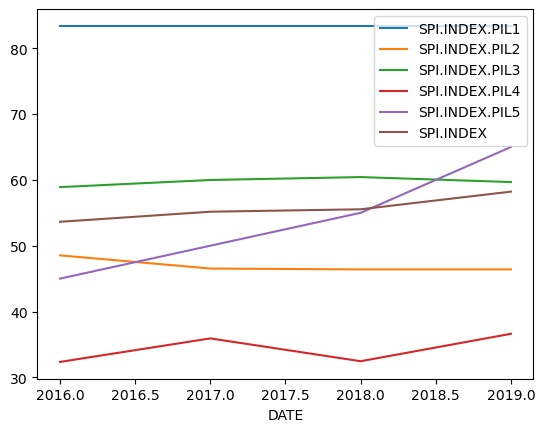

In [13]:
# 6. Track China’s performance for all pillars +overall over time (2016-2019) (line chart)
df_q6=df_index[df_index['COUNTRY CODE']=='CHN'].iloc[:,[2,3,4,5,6,7,8]]
df_q6=df_q6[df_q6['SPI.INDEX'].notnull()]
df_q6=df_q6.set_index('DATE')
df_q6.plot()

In 2016-2019, China's overall score has seen a minor increase. It has a higher than average pillar 1 score. However, values in pillar 4 are lower than average for all countries. Indicator values in pillar 5 has also seen a great increase throghout the years. 

<Axes: xlabel='DATE'>

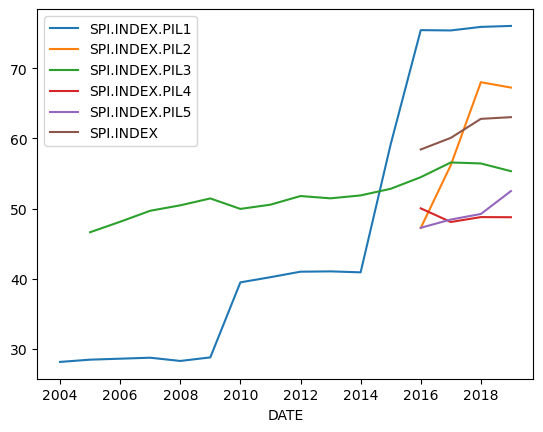

In [14]:
# Track all countries’s performance for all pillars +overall over time (2016-2019) (line chart)
df_q7 = df_index.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
# Mean score across columns grouped by DATE
df_q7 = df_q7.groupby("DATE")[
    [
        "SPI.INDEX.PIL1",
        "SPI.INDEX.PIL2",
        "SPI.INDEX.PIL3",
        "SPI.INDEX.PIL4",
        "SPI.INDEX.PIL5",
        "SPI.INDEX",
    ]
].mean()  
df_q7.plot()


All valid data for each pillar is plotted. overall SPI index score, along with pillars 2,4,5 only have valid entries from 2016 to 2019. I notice a general uprend in the scores measured in these years.

A steep uptrend for mean score of pillar 2 (data services) from 2016 to 2019 while pillar 4 (data sources)has experienced a minor downtrend

From 2004 to 2019, pillar 1 (data use) mean scores has had a sharp increase from under 30 to close to 100

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


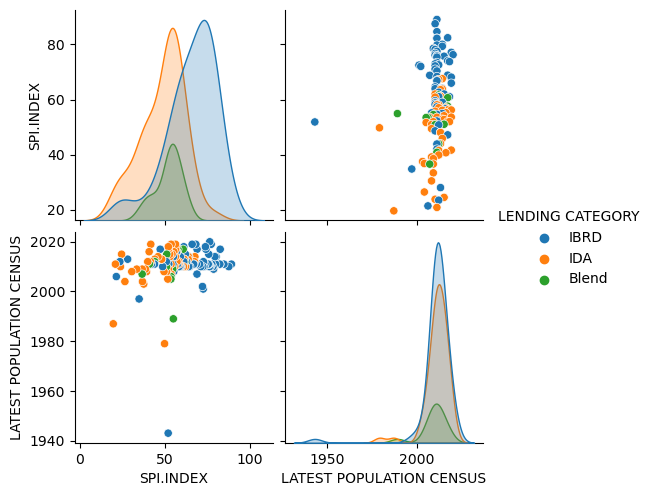

In [18]:
#Correlation between SPI score vs. other variables of the countries in 2019 (latest population census, lending category)
# Rename the columns to make them more informative 
df_country.columns=df_country.columns.str.upper()
df_index=df_index[df_index['COUNTRY CODE']!='TWN']

# Inspect the lastest population census column
df_country['LATEST POPULATION CENSUS']=df_country['LATEST POPULATION CENSUS'].fillna('None')
# Change entries in the column to numeric values
def get_year(string):
    years = [int(word.rstrip('.')) for word in string.split() if word.rstrip('.').isdigit()]
    for year in years: 
        return year
df_country['LATEST POPULATION CENSUS']=df_country['LATEST POPULATION CENSUS'].map(get_year)
#plot SPI score against latest population census year, categorized by lending category 
df_q9=df_index_2019.merge(df_country,on='COUNTRY CODE')[['COUNTRY','SPI.INDEX','LATEST POPULATION CENSUS','LENDING CATEGORY']]
df_q9=df_q9.set_index('COUNTRY')
sns.pairplot(df_q9,hue='LENDING CATEGORY') 


Most of the latest population censuses are performed post 2000s. There's a slight posiive correlation between SPI score and latest population census year. In addition, countries in lending category IBRD tend to have the highest SPI index scores and variability with most countries falling into this category. Countries in lending cateogry IDA and blend have about the same average SPI scores but the IDA group's scores have more variability. There's not much difference in how early each country performs its latest population census with regard to lending categories.  

**Conclusions and Discussion**

The Statistical Performance Indicators (SPI) from the World Bank offer a crucial assessment of each nation's statistical performance from 2016 to 2019. By emphasising five key pillars—data use, services, products, sources, and infrastructure.

While the SPI.INDEX.PIL1 (Data Use) is regularly populated and offers higher values, indicating a significant active utilisation of data by countries, the analysis reveals that the SPI.INDEX.PIL4 (Data Sources) reveals difficulties in data collection. Despite its importance, this pillar had the lowest mean score of the five, highlighting how important it is and any potential difficulties in obtaining reliable data sources. SPI.INDEX.PIL5 (Data Infrastructure), on the other hand, displayed substantial variability, which reflected the varying infrastructure maturity between countries.

On a regional level, North America and Europe stand out as statistical leaders, whereas places like Sub-Saharan Africa have a lot of space to grow. The increase in pillar 2 (data services) ratings between 2016 and 2019 is a noteworthy temporal pattern that suggests prospective developments in this area. Scores for pillar 4 (data sources), however, saw a modest fall.

The most recent year of a country's population census has a little positive link with SPI scores. This shows that countries with regular census data updates have better statistical results. Additionally, nations that fall under the IBRD lending category typically have higher SPI scores, which may indicate more sophisticated resources or systems.

In conclusion, the SPI emphasises the need of timely and accurate statistical data for informed decision-making on a worldwide scale. The index's discrepancies and data gaps highlight the need for better data collection methods. The findings from SPI can direct international initiatives to strengthen statistical capabilities, fostering data-driven policymaking and closing gaps in the process. 


**References**

Dang, H. A. H., Pullinger, J., Serajuddin, U., & others. (2023). Statistical performance indicators and index—a new tool to measure country statistical capacity. Sci Data, 10(146). https://doi.org/10.1038/s41597-023-01971-0

Tanwar, A. (2023). World Bank Statistical Performance Indicators. Kaggle. Retrieved from https://www.kaggle.com/datasets/anshtanwar/statistical-performance-indicators

World Bank. (2023a). Statistical Performance Indicators. GitHub. Retrieved from https://github.com/worldbank/SPI

World Bank. (2023b). Statistical Performance Indicators: Framework. Retrieved from https://www.worldbank.org/en/programs/statistical-performance-indicators/Framework


